In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob

from keras.models import load_model
model = load_model('./training_models/NN_digit.h5')

In [17]:
def show_mask(mask):
    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')

def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

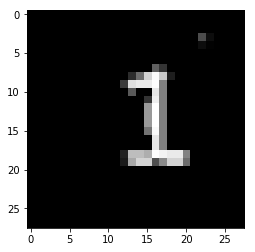

In [41]:
cell57 = np.load('./SudokuCells/cell_np6 6.npy')
image = cell57.reshape((28, 28))
plt.imshow(image, 'gray')

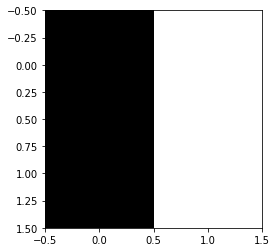

In [47]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(contours, key = cv2.contourArea)

x,y,w,h = cv2.boundingRect(cnt)


plt.imshow(roi, 'gray')

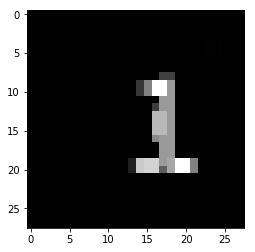

In [34]:
kernel = np.ones((2, 2), np.uint8)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, 'gray')